## Q-1-1-2

Use different distance measures as applicable. Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import sys

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filename = sys.argv[1]
# filename = "robot2"
def loadfile(file_name):
    if file_name=="iris":
        filename = '../input_data/Iris/Iris.csv'
        df = pd.read_csv(filename, names = ["a", "b", "c", "d", "Y"])
    elif file_name=="robot1":
        filename = '../input_data/RobotDataset/Robot1'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    else:
        filename = '../input_data/RobotDataset/Robot2'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    return df

df = loadfile(filename)

In [3]:
Y = df.Y
X = df.drop(['Y'],axis='columns')

if filename != "iris":
    X = pd.DataFrame( preprocessing.normalize(X), columns = [ "a", "b", "c", "d", "e", "f" ]  )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
labels = Y.unique()
df1 = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)

In [4]:
def distance_measure(x, y, flag):
    if flag == 1:
        return np.sqrt(np.sum((x - y) ** 2))
    elif flag == 2:
        return 1 - ( np.dot(x,y) / ( np.sqrt( np.dot(x,x) ) * np.sqrt( np.dot(y,y) ) ) )
    else:
        return np.sum(abs(x - y))

In [5]:
def predict( df, k=5, flag = 0 ):
    Y_predict = []
    for index, row in X_test.iterrows():
        distance = {}
        labeldict = {i:0 for i in labels}
        for index1, row1 in df1.iterrows():
            distance[index1] = distance_measure(row,row1[:-1],flag)
        
        ordered_dict = sorted(distance.items(), key=operator.itemgetter(1))
        
        count = k
        for index,_ in ordered_dict:
            count-=1
            labeldict[df1.iloc[index].Y]+=1
            if count==0:
                break
                
        ans_label=0
        ans_count=-1
        
        for label,cnt in labeldict.iteritems():
            if cnt>=ans_count:
                ans_label=label
                ans_count=cnt
        Y_predict.append(ans_label)
    return Y_predict

In [6]:
x_axis = [i for i in xrange(1,12)]

In [7]:
predict_euclid = list()
for i in x_axis:
    predict_euclid.append(accuracy_score( Y_test, predict( X_test, i, 1)))

In [8]:
predict_cosine = list()
for i in x_axis:
    predict_cosine.append(accuracy_score( Y_test, predict( X_test, i, 2)))

In [9]:
predict_manhattan = list()
for i in x_axis:
    predict_manhattan.append(accuracy_score( Y_test, predict( X_test, i, 3)))

Text(0.5,1,'accuracy with change in value of K')

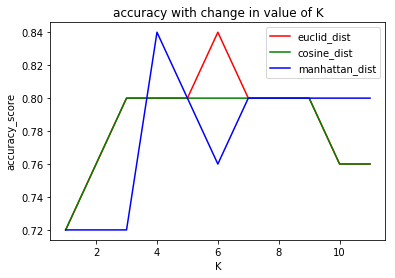

In [10]:
fig, axis = plt.subplots()

axis.plot( x_axis, predict_euclid, label="euclid_dist", color = 'red' )
axis.plot( x_axis, predict_cosine, label="cosine_dist", color = 'green' )
axis.plot( x_axis, predict_manhattan, label="manhattan_dist", color = 'blue' )

axis.legend()
axis.set_xlabel("K")
axis.set_ylabel("accuracy_score")
axis.set_title("accuracy with change in value of K")
